#### Example used in the kaggle course, Scaling and Normalization. 
Can be run in the test environment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# Set seed for reproducibility
np.random.seed(0)


ModuleNotFoundError: No module named 'mlxtend'

In [2]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

/home/bdk01/anaconda3/envs/test/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/bdk01/anaconda3/envs/test/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

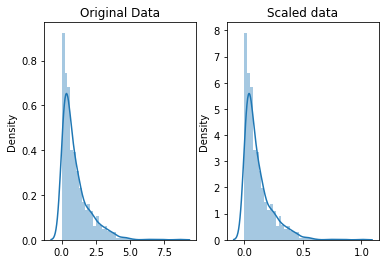

In [3]:
# plot both together to compare
fig, ax = plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

### Replacing distplot

distplot is being replaced by displot. displot includes facetting to draw a trellis or matrix of axes into a figure maintained with FacetGrid. An axes object is used for each individual graph that is positioned in its own part of the overall figure object.

Notice that two calls to distplot were needed to plot the original and scaled data stored in two distinct nparrays. Both FacetGrid and displot do not use data stored in this arrangement but use   a column as a key to select different collections of values. 

In [4]:
# Make a dataframe from the 2 numpy arrays

original = pd.DataFrame(original_data, columns=['value'])
original['type'] = 'original'

scaled = pd.DataFrame(scaled_data, columns=['value'])
scaled['type'] = 'scaled'

df = pd.concat([original,scaled], axis='rows').reset_index()
df.head()


index     value      type
0      0  0.795875  original
1      1  1.255931  original
2      2  0.923223  original
3      3  0.787201  original
4      4  0.551048  original

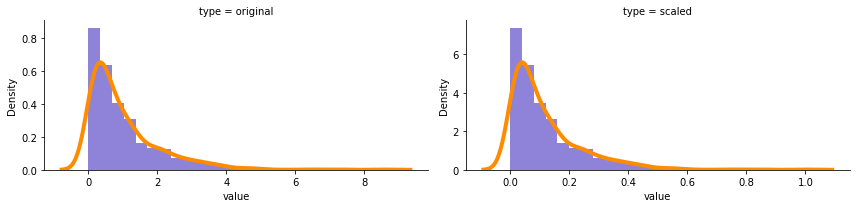

In [5]:
# Use the FacetGrid to show "small multiples" i.e. a separate graph for each value of type
# arranged in a grid.
# Note: displot cannot be used as one of the functions in map_dataframe because it does not support the ax parameter.
# Background: FacetGrid wraps objects produced figure and sub_plot objects

# Colors at https://matplotlib.org/stable/gallery/color/named_colors.html 

g = sns.FacetGrid(df, col='type', sharey=False, sharex=False, aspect=2)
g.map_dataframe(sns.histplot, x='value', stat='density', cumulative=False, linewidth=0, fill=True, color='slateblue', bins=25)
# g.map_dataframe(sns.histplot, x='value', cumulative=False, linewidth=0, fill=True, color='slateblue')
g.map_dataframe(sns.kdeplot, x='value', color='darkorange', linewidth=4)



I'm trying to reproduce the distplot and FacetGrid plots with displot. As of 9/2/2021 I am having two issues:
1. The density is just half of the other plots  
Is density calculated over all data, not just the specific hue?  
Solved: common_norm  
= False will normalize the data in the individual facet   
= True  normalizes the dat in all the facets<p>

2. The 2 graphs have the same x range  
Solved: common_bins  
= False uses range of facet  
= True uses range of all facets  
<p>
3. Want to use a thick line for kde

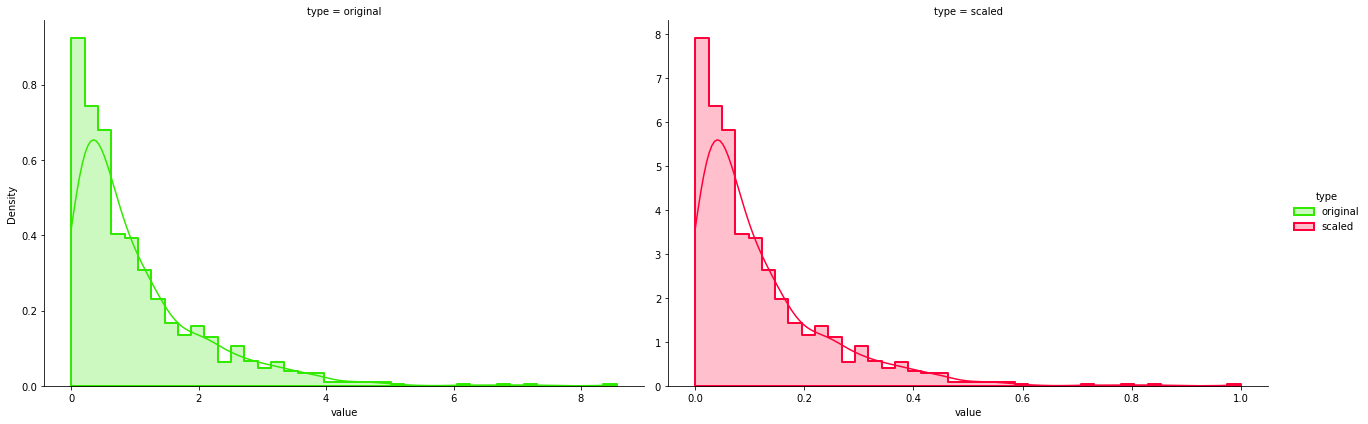

In [6]:
# displot has built-in support for small multiples

g1 = sns.displot(data=df, x='value', stat='density', kind='hist', kde=True, col='type', \
                 hue='type', palette='prism', aspect=1.5, element='step', height=6, \
                 fill=True, linewidth=2, common_bins=False, common_norm=False, \
                 facet_kws={'sharex':False, 'sharey':False}
                 )


Looking at the underlying matplotlib fig and ax objects that are used by disploy

In [7]:
for val, ax in g1.axes_dict.items():
    print(val, ax)

original AxesSubplot(0.0349001,0.0967593;0.437904x0.845833)
scaled AxesSubplot(0.490455,0.0967593;0.437904x0.845833)


In [8]:
g1.axes[0][1].title

Text(0.5, 1.0, 'type = scaled')

#### Normalization
Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

Normal distribution: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you'll normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

The method we're using to normalize here is called the Box-Cox Transformation. Let's take a quick peek at what normalizing some data looks like:

/home/bdk01/anaconda3/envs/test/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/bdk01/anaconda3/envs/test/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

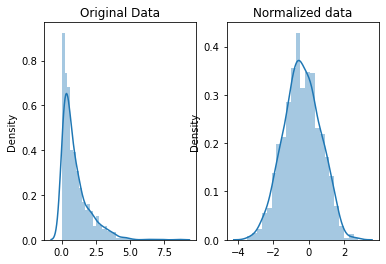

In [14]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

Notice that the shape of our data has changed. Before normalizing it was almost L-shaped. But after normalizing it looks more like the outline of a bell (hence "bell curve").

### Exercise
Get our environment set up
To practice scaling and normalization, we're going to use a dataset of Kickstarter campaigns. (Kickstarter is a website where people can ask people to invest in various projects and concept products.)

The next code cell loads in the libraries and dataset we'll be using.

In [4]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
# File was downloaded from https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv

kickstarters_2017 = pd.read_csv("../input/kickstarter-projects/ks-projects-201801.csv")

# set seed for reproducibility
np.random.seed(0)

/home/bdk01/anaconda3/envs/test/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/bdk01/anaconda3/envs/test/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data2')

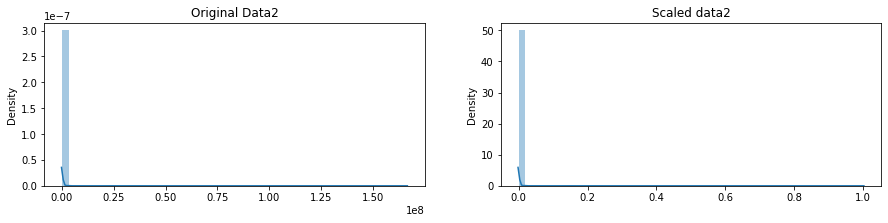

In [5]:
# select the usd_goal_real column
original_data2 = pd.DataFrame(kickstarters_2017.usd_goal_real)

# scale the goals from 0 to 1
scaled_data2 = minmax_scaling(original_data2, columns=['usd_goal_real'])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2, figsize=(15,3))
sns.distplot(original_data2, ax=ax[0])
ax[0].set_title("Original Data2")
sns.distplot(scaled_data2, ax=ax[1])
ax[1].set_title("Scaled data2")

After scaling, all values lie between 0 and 1 (you can read this in the horizontal axis of the second plot above, and we verify in the code cell below).

#### Reproduce graphs using displot


In [30]:
original2 = original_data2.copy()
original2.columns = ['value']
original2['type'] = "Original Data"


scaled2 = scaled_data2.copy()
scaled2.columns = ['value']
scaled2['type'] = 'Scaled Data'


df2 = pd.concat([original2, scaled2], axis='rows').reset_index()
df2

index         value           type
0            0   1533.950000  Original Data
1            1  30000.000000  Original Data
2            2  45000.000000  Original Data
3            3   5000.000000  Original Data
4            4  19500.000000  Original Data
...        ...           ...            ...
757317  378656      0.000301    Scaled Data
757318  378657      0.000009    Scaled Data
757319  378658      0.000090    Scaled Data
757320  378659      0.000090    Scaled Data
757321  378660      0.000012    Scaled Data

[757322 rows x 3 columns]

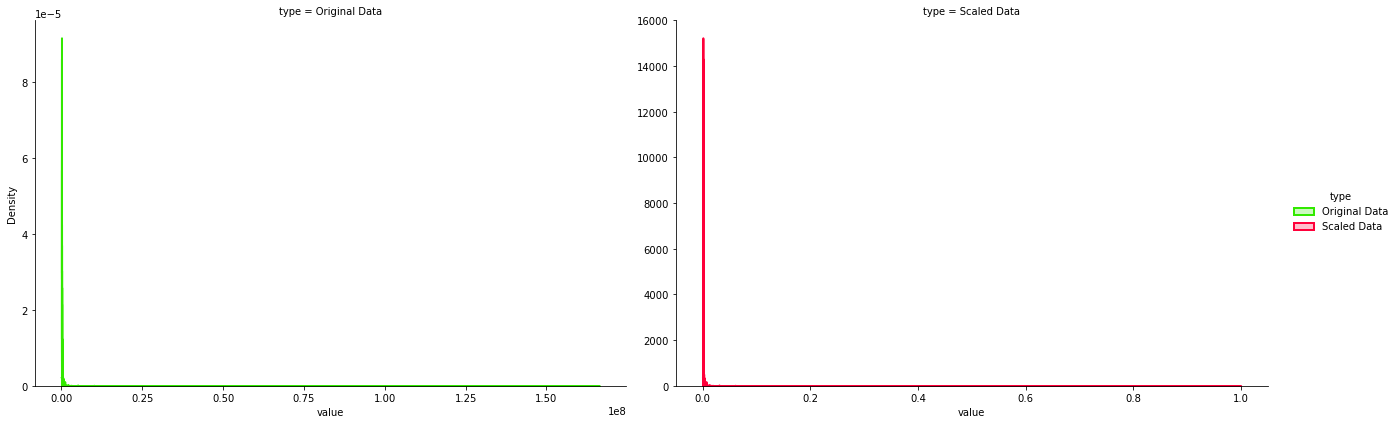

In [21]:
sns.displot(data=df2, x='value', \
            col='type', hue='type', \
            kind='hist', kde=True, stat='density',  \
            common_bins=False, common_norm=True, \
            element='step', linewidth=2, \
            palette='prism', fill=True, height=6, aspect=1.5, \
            facet_kws={'sharex':False, 'sharey':False})

After scaling, all values lie between 0 and 1 (you can read this in the horizontal axis of the second plot above, and we verify in the code cell below).

In [23]:
# Must use the dataframe partitioned 

orig = df2[df2.type=='Original Data'].value
scal = df2[df2.type=='Scaled Data'].value

print('Original data2\nPreview:\n', orig.head())
print('Minimum value:', float(orig.min()),
      '\nMaximum value:', float(orig.max()))
print('_'*30)

print('\nScaled data2\nPreview:\n', scal.head())
print('Minimum value:', float(scal.min()),
      '\nMaximum value:', float(scal.max()))

Original data2
Preview:
 0     1533.95
1    30000.00
2    45000.00
3     5000.00
4    19500.00
Name: value, dtype: float64
Minimum value: 0.01 
Maximum value: 166361390.71
______________________________

Scaled data2
Preview:
 378661    0.000009
378662    0.000180
378663    0.000270
378664    0.000030
378665    0.000117
Name: value, dtype: float64
Minimum value: 0.0 
Maximum value: 1.0


### 1) Practice scaling
We just scaled the "usd_goal_real" column. What about the "goal" column?

Begin by running the code cell below to create a DataFrame original_goal_data containing the "goal" column.

In [24]:
# select the usd_goal_real column
original_goal_data = pd.DataFrame(kickstarters_2017.goal)

Use original_goal_data to create a new DataFrame scaled_goal_data with values scaled between 0 and 1. You must use the minimax_scaling() function.

In [25]:
scaled_goal_data = minmax_scaling(original_goal_data, columns=['goal'])

/home/bdk01/anaconda3/envs/test/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/bdk01/anaconda3/envs/test/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled by Goal data')

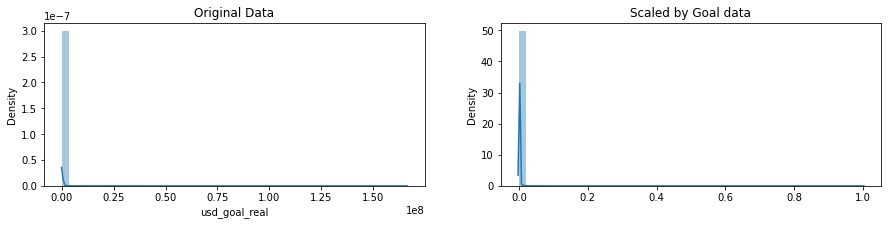

In [26]:
# plot the original & scaled (by goal) data together to compare (extra)
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(kickstarters_2017.usd_goal_real, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_goal_data, ax=ax[1])
ax[1].set_title("Scaled by Goal data")

### 2) Practice normalization
Now you'll practice normalization. We begin by normalizing the amount of money pledged to each campaign.

/home/bdk01/anaconda3/envs/test/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/bdk01/anaconda3/envs/test/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

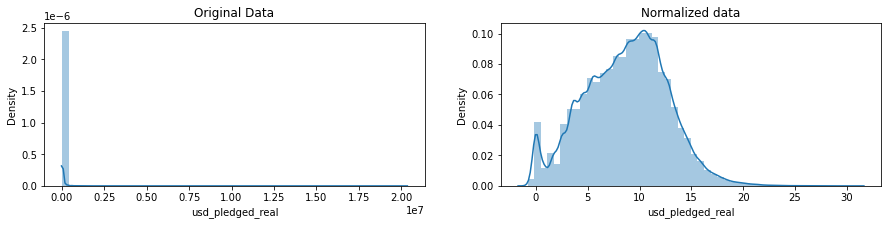

In [27]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], 
                               name='usd_pledged_real', index=positive_pledges.index)

# plot both together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

It's not perfect (it looks like a lot pledges got very few pledges) but it is much closer to a normal distribution!

In [28]:
print('Original data\nPreview:\n', positive_pledges.head())
print('Minimum value:', float(positive_pledges.min()),
      '\nMaximum value:', float(positive_pledges.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_pledges.head())
print('Minimum value:', float(normalized_pledges.min()),
      '\nMaximum value:', float(normalized_pledges.max()))

Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Minimum value: 0.45 
Maximum value: 20338986.27
______________________________

Normalized data
Preview:
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836853
Name: usd_pledged_real, dtype: float64
Minimum value: -0.7779954122762203 
Maximum value: 30.69054020451361


We used the "usd_pledged_real" column. Follow the same process to normalize the "pledged" column.

/home/bdk01/anaconda3/envs/test/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/bdk01/anaconda3/envs/test/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized pledged data')

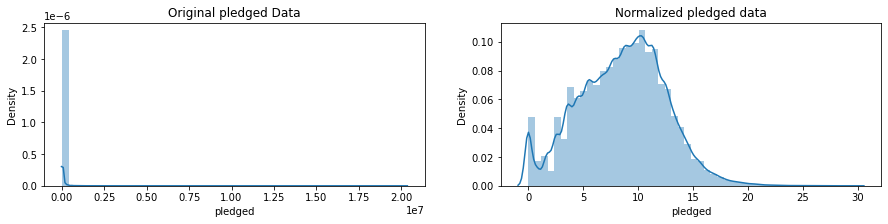

In [29]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.pledged > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.pledged.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], 
                               name='pledged', index=positive_pledges.index)

# plot both together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original pledged Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized pledged data")

In [34]:
pledges = positive_pledges.copy()
pledges.columns = ['value']
pledges['type'] = "Original Plegded Data"


normalized_pledges = scaled_data2.copy()
normalized_pledges.columns = ['value']
normalized_pledges['type'] = 'Normalized Data'


df3 = pd.concat([pledges, normalised_pledges], axis='rows').reset_index()
df3

index        0             type     value
0            1   2421.0              NaN       NaN
1            2    220.0              NaN       NaN
2            3      1.0              NaN       NaN
3            4   1283.0              NaN       NaN
4            5  52375.0              NaN       NaN
...        ...      ...              ...       ...
704791  378656      NaN  Normalized Data  0.000301
704792  378657      NaN  Normalized Data  0.000009
704793  378658      NaN  Normalized Data  0.000090
704794  378659      NaN  Normalized Data  0.000090
704795  378660      NaN  Normalized Data  0.000012

[704796 rows x 4 columns]

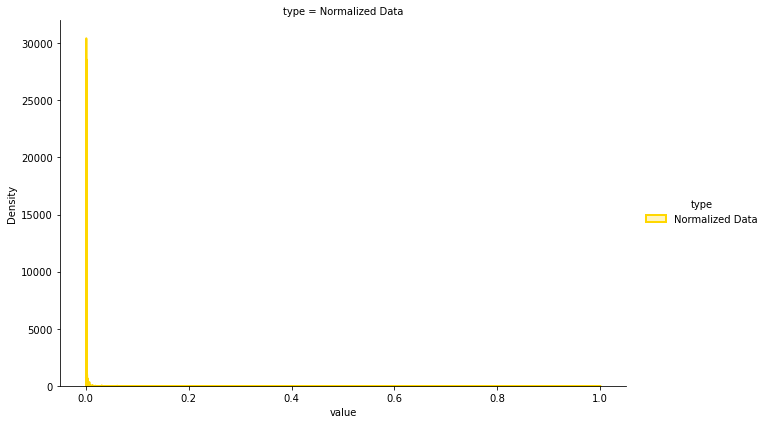

In [35]:
sns.displot(data=df3, x='value', \
            col='type', hue='type', \
            kind='hist', kde=True, stat='density',  \
            common_bins=False, common_norm=True, \
            element='step', linewidth=2, \
            palette='prism', fill=True, height=6, aspect=1.5, \
            facet_kws={'sharex':False, 'sharey':False})